# Step 1: Importing Libraries

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Step 2:  Reading and Understanding the Data

In [75]:
# Reading the day.csv file using pandas
bike_df = pd.read_csv('day.csv')

# Inspecting 1st 5 rows
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [76]:
# Checking the shape of dataframe (No of rows = 730 and No of columns = 16)
bike_df.shape

(730, 16)

In [77]:
# Checking the dtype of all the columns of dataframe
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [78]:
# Checking the dtype and non-Null count of all the columns of dataframe (There are no null values in any column)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [79]:
# Checking the descriptive statistics of numerical data
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [80]:
# Checking the size of the dataframe
bike_df.size

11680

OBSERVATION: 
1. Dataset has 730 rows and 16 columns
2. Dataset has 11 numeric columns, 4 float type columns and 1 date type column
3. There are no null values in the dataset

# Step 3: Data quality check

In [81]:
# Checking the null values of the dataframe
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [82]:
# Checking the duplicate data of the dataframe (Create a dummy dataframe (copy of original bike_df dataframe) for duplicate check and Checking for duplicates and dropping the entire duplicate row if any )
bike_dupli =  bike_df                                                                                                                                                                                                                                                                                                                                                        

# Checking for duplicates in the dataframe and dropping the entire duplicate row if any)
bike_dupli.drop_duplicates(subset=None, inplace=True)                                                                                                                                                                                                                                                      

In [83]:
# Checking the shape of the duplicate dataframe
bike_dupli.shape                                                                                                                                                                                                                                                                                                                                                                                                                                                              

(730, 16)

# Step 3: Cleaning the Data

In [84]:
# We have to remove the columns which are not useful for analysis

In [85]:
 # Checking the column names of the dataframe
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**a) Dropping irrelevant and unimportant columns** 

In [87]:
# instant - Its an id column and all the ids are unique so we can drop it.
# dteday - As we already have separate columns for month, year and weekday so there is no need of dteday column for the analysis.
# casual and registered - casual and registered columns should be dropped as we have cnt column which is sum of the both (casual and registered) that is the target column

In [88]:
bike_df.drop(['instant','dteday','casual','registered'], axis=1, inplace = True)

#Inspecting dataframe after dropping
bike_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

**b) Handle missing values**

In [91]:
# we have already seen that there are no missising values. However, let's verify it again
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**c) Handle outliers**

In [92]:
# Checking the column names of the dataframe
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [93]:
# Checking the unique values of all the columns of the dataframe
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

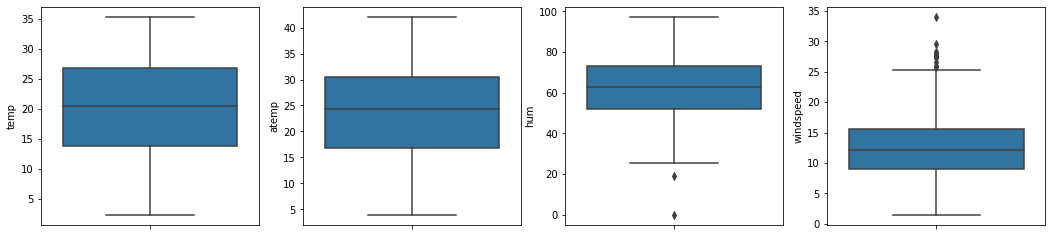

In [94]:
# Drawing box plots for numerical variables with continuous values
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

**We can see form these plots that there are no outliers. So, there is no need to handle it.**

# Step 4: Visualising the data (EDA)

**a) Visualising numeric variables**

<Figure size 1440x2160 with 0 Axes>

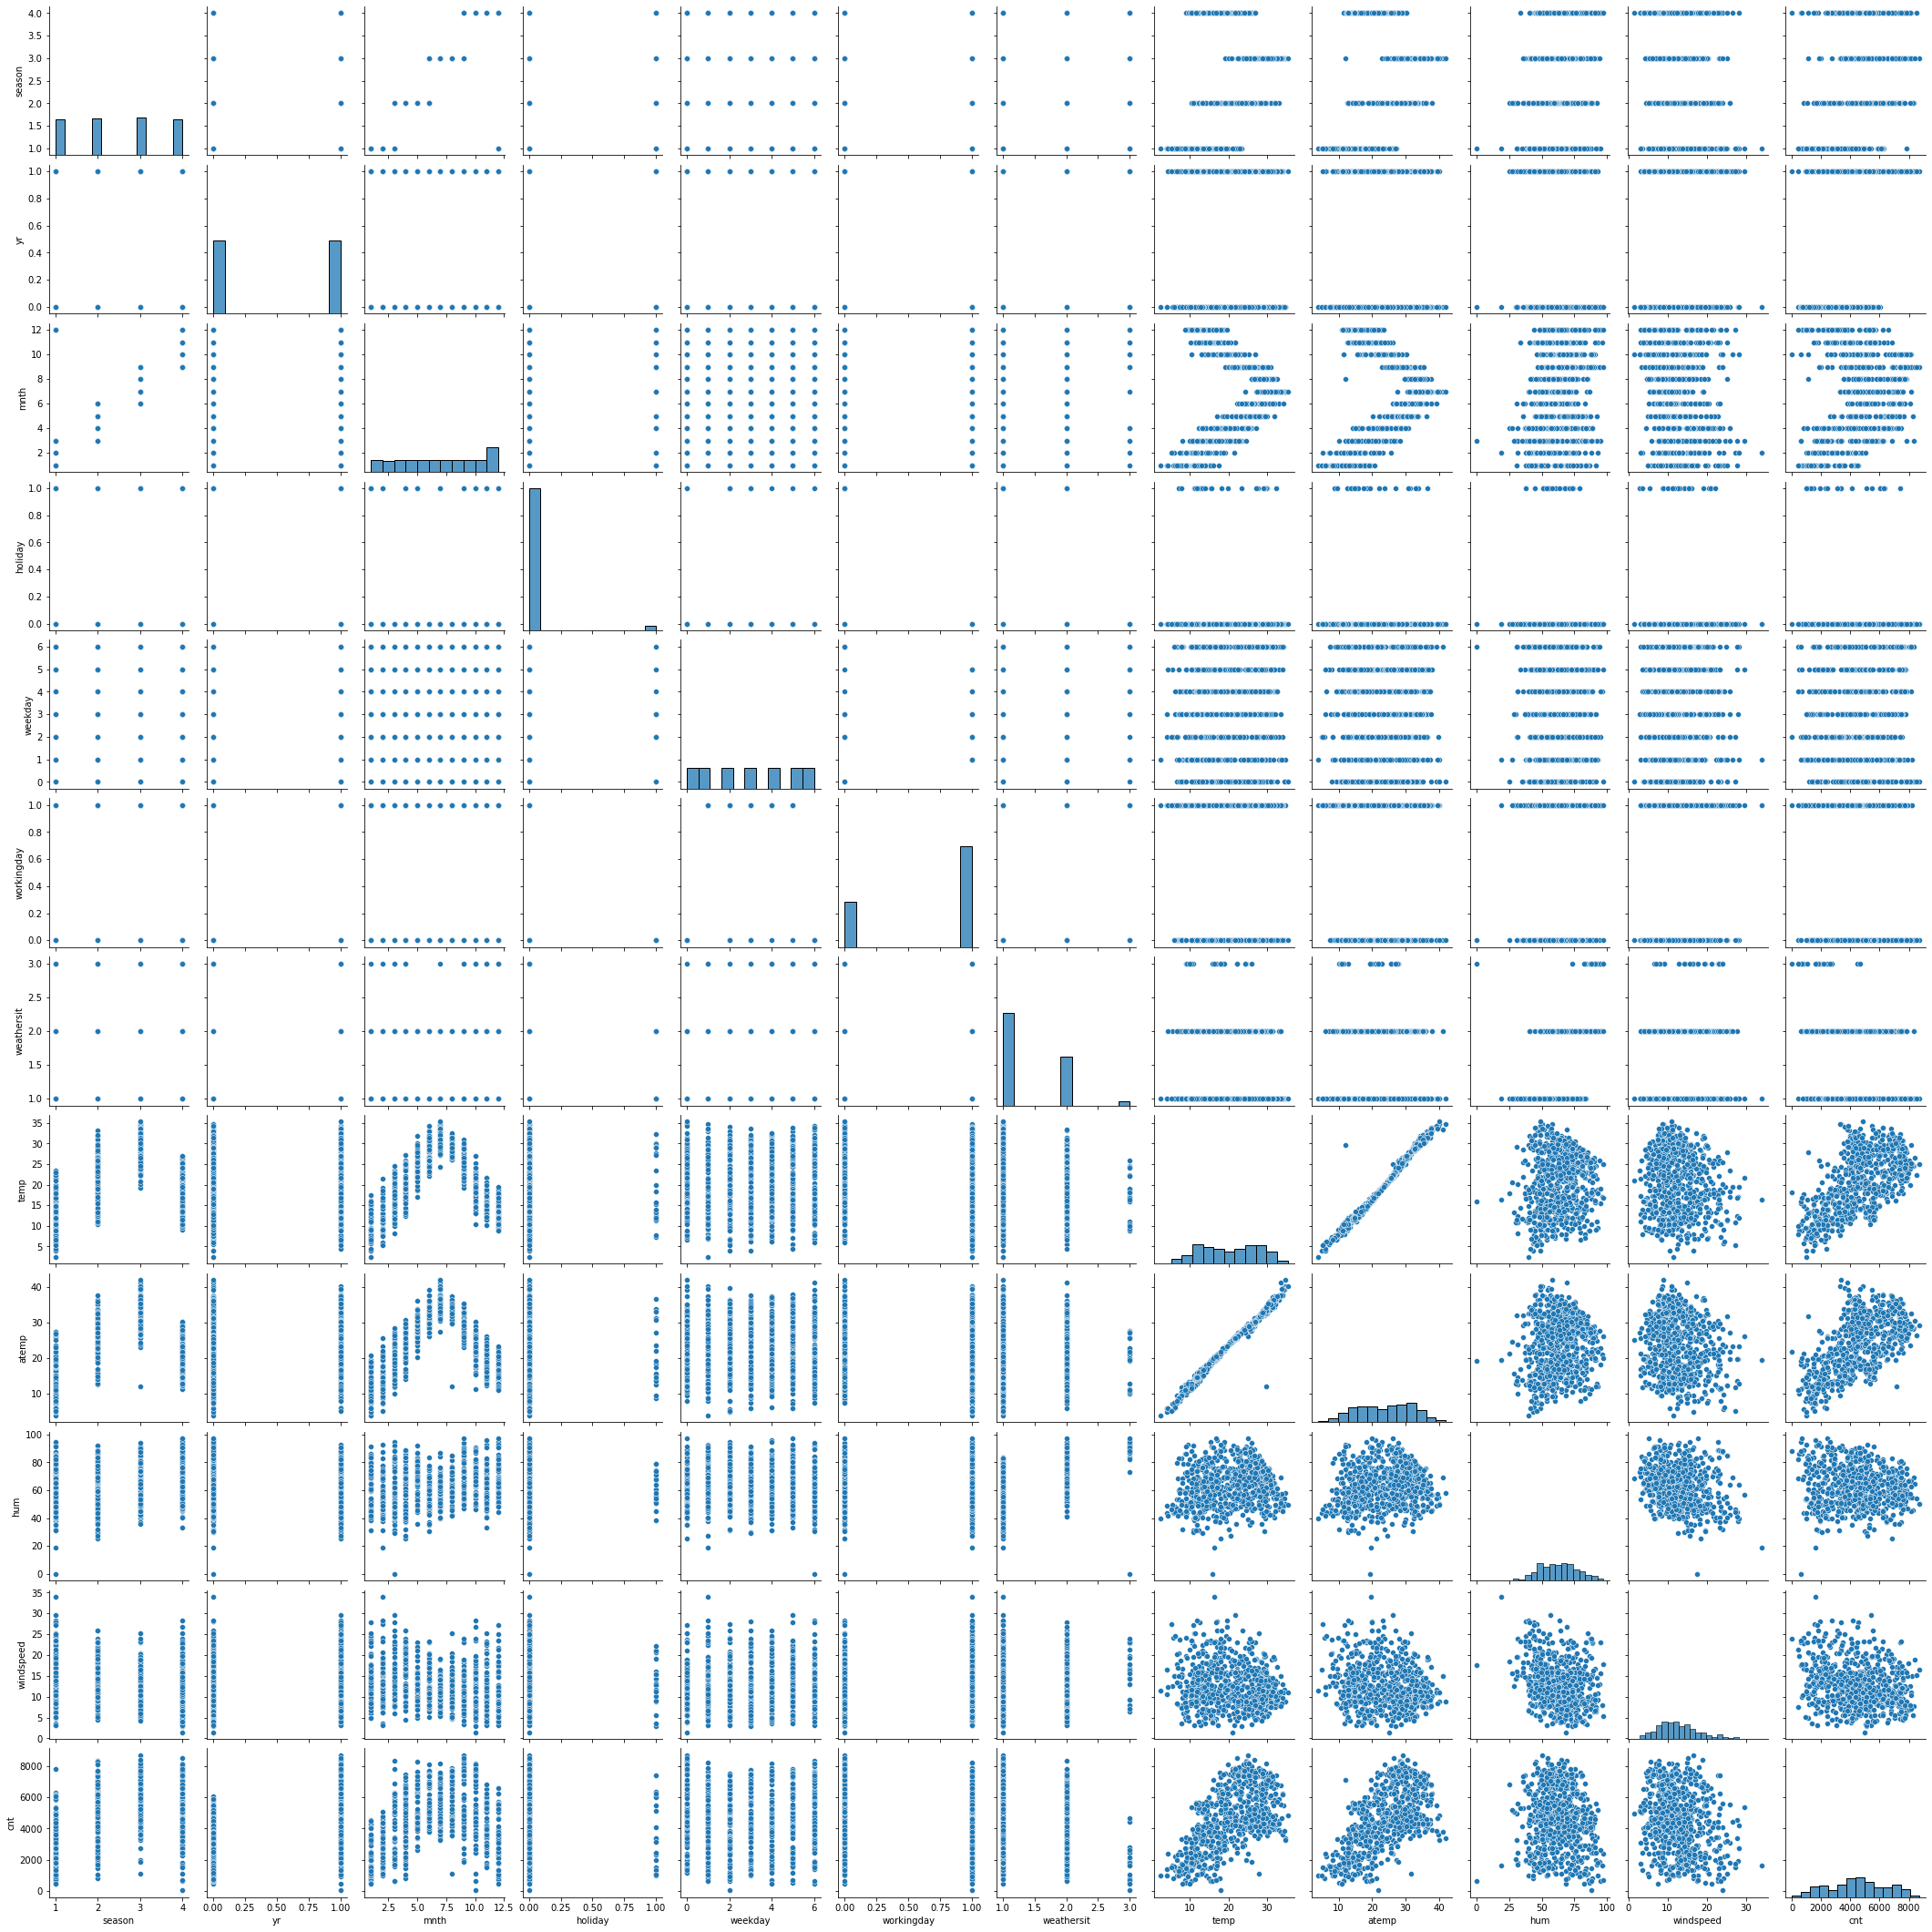

In [100]:
# Drawing pair plot for all the variables of the data frame
plt.figure(figsize=(20,30))
sns.pairplot(bike_df)
plt.show()

<Figure size 720x1440 with 0 Axes>

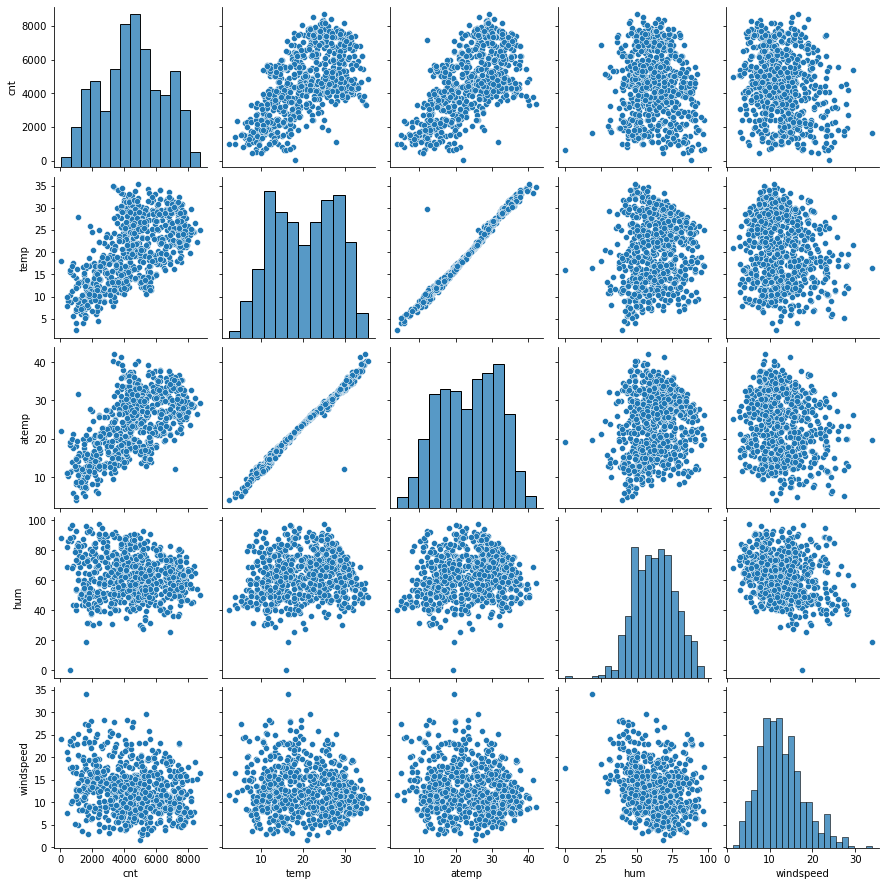

In [101]:
# Drawing pair plot for all the numeric variables
plt.figure(figsize = (10,20))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

**This pair plot is showing the linear relationship of cnt with temp and atemp**

<AxesSubplot:>

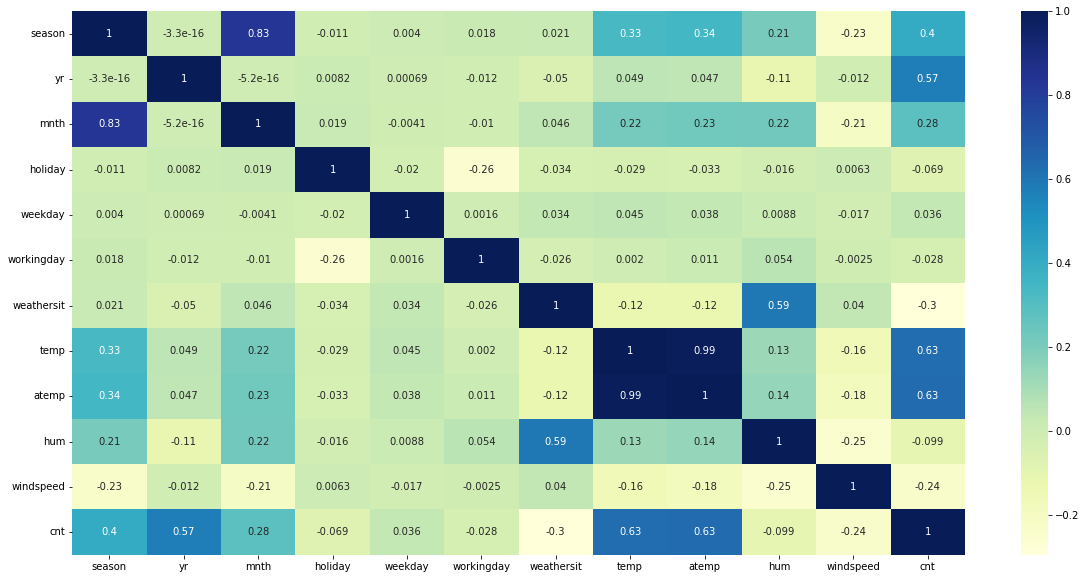

In [103]:
# Plotting heatmap to check the relationship of continuous variables with each other
plt.figure(figsize = (20,10))     
sns.heatmap(bike_df.corr(),cmap="YlGnBu",annot = True)

**This heatmap shows that temp and atemp are highly correlated with each other (0.99) so we can drop one variable. Since temp is the measured temperature and atemp is feeling temperature. So, its better to drop atemp.**

**The heatmap clearly shows the multicollinearity among some variables. Moreover, it also shows the high collinearity of some variables with the target variable.**

**This map will give a good insight while building the linear model as we can validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.**

**Visualising Categorical Variables**

In [104]:
# Check the unique values for all the columns.
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

**The unique value suggests that season, yr, mnth, holiday, weekday, workingday and weathersit are categorical columns.**

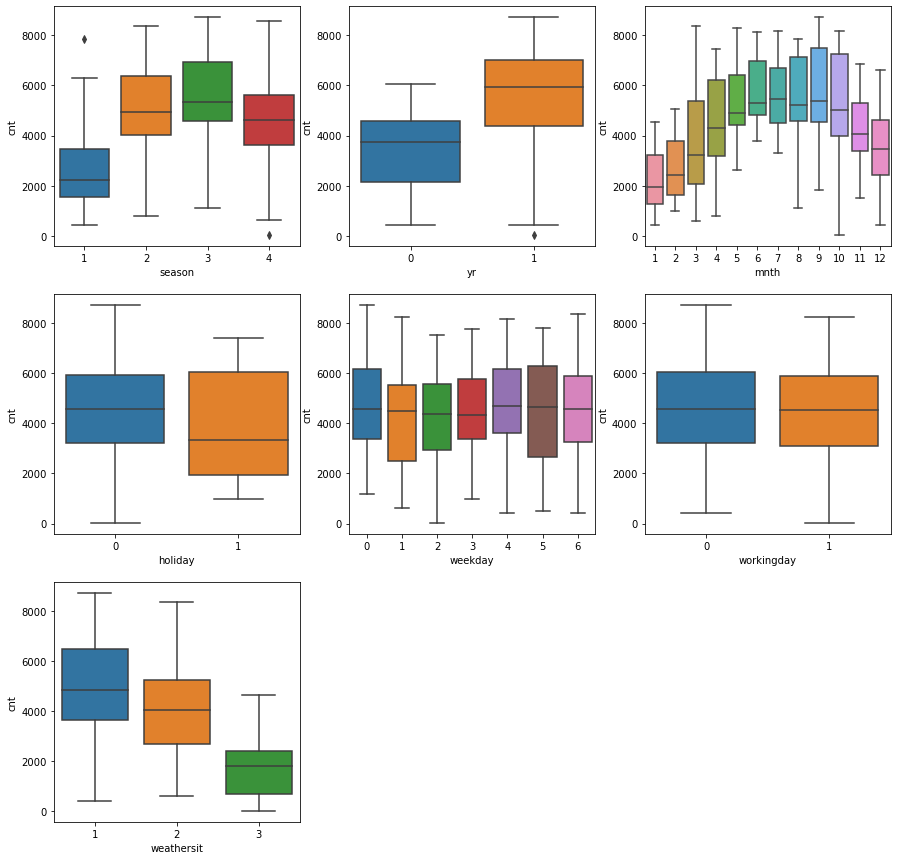

In [108]:
# Making a boxplot for these categorical variables.
categorical_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(categorical_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()


**Following inferences we can draw abount these categorical variables from these box plots**

In [ ]:
Season: Most of the bikes were rented in season3 having median of over 5000 bookings. 
Yr: Demand of rental bikes were increasing from 2018 to 2019.
mnth: Demand of rental bikes were increasing from January to June then it showed a drop in July, 
again the demand were increasing from July to September. Further it showed a decreasing trend from September to December.
holiday: During holidays demand for rental bikes has decreased.
weekday: All the days of the week were showing very close trend, so its not giving any clear picture. 
workingday: Workingday was also not showing any clear trend for the demand of rental bikes.
weathersit: It was showing a clear decreasing trend of the rental bikes from weathersit 1 to 3.

**These box plots suggests that season, yr, mnth and weathersit can be a good predictor for the cnt variable**

# Step 4: Data preparation

**a) Encoding**

In [ ]:
# Three categorial columns - yr, holiday and workingday having binary format i.e. one and zero
# There is a need to create dummy variables for rest of the categorical columns - season, mnth, weekday and weathersit.
# For creating dummy variables 1st we have to change these columns into categorical type.

In [ ]:
# Checking the dtype of the variables in the dataframe and creating a new name of the dataframe

In [113]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [114]:
bike_df_new = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 90.3 KB


In [115]:
# Converting variables to 'category' data type

bike_df_new['season']=bike_df_new['season'].astype('category')
bike_df_new['mnth']=bike_df_new['mnth'].astype('category')
bike_df_new['weekday']=bike_df_new['weekday'].astype('category')
bike_df_new['weathersit']=bike_df_new['weathersit'].astype('category')

# Checking the info of the variables after converting into categorical dtype.
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 71.4 KB


In [116]:
# Creating dummy variables.
bike_df_new = pd.get_dummies(bike_df_new, drop_first=True)

In [117]:
# Checking the new dataframe after creating dummy variables
bike_df_new.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0         0         0  ...        0        0          1          0          0   
1         0         0  ...        0        0          0          1          0   
2         0         0  ...        0        0          0          0          1   
3         0         0  ...        0        0          0          0          0   
4         0         0  ...        0        0          0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          0             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          1          0          0             0             0  
4          0          1          0             0             0  

[5 rows x 30 columns]

In [121]:
# Check column names after creating dummies
bike_df_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [123]:
# Checking the shape of the new dataframe after creating dummy variables
bike_df_new.shape

# New dataframe has 30 columns

(730, 30)

In [119]:
# Checking the info of the new dataframe after creating dummy variables
bike_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

# Step 4: Splitting of the data into train and test

In [ ]:
# Before test train split dataframe has 730 rows and 30 columns.

In [124]:
# We specify 'random_state' so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_df_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [125]:
# Checking the shape of the train data set after splitting  
df_train.shape

(510, 30)

In [128]:
# Checking the info of the train data set after splitting  
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null   

In [127]:
# Checking the shape of the test data set after splitting  
df_test.shape

(219, 30)

In [129]:
# Checking the info of the test data set after splitting  
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

# Rescaling the features

For rescaling we will use min max scaling

In [ ]:
scaler = MinMaxScaler()

In [130]:
# Checking the values of the test dataframe before scaling
df_train.head()

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
653   1        0           1  19.201653  23.0423  55.8333  12.208807  7534   
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728   1        0           1  10.489153  11.5850  48.3333  23.500518  1796   
482   1        0           0  15.443347  18.8752  48.9583   8.708325  4220   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
653         0         0  ...        0        0          0          0   
576         0         1  ...        0        0          0          0   
426         0         0  ...        0        0          0          0   
728         0         0  ...        0        1          1          0   
482         1         0  ...        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
653          1          0          0          0             0             0  
576          1          0          0          0             0             0  
426          0          0          0          0             1             0  
728          0          0          0          0             0             0  
482          0          0          0          0             1             0  

[5 rows x 30 columns]

In [131]:
# Checking the column names of the test dataframe before scaling
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [133]:
# Apply scaler() to all the columns except the 'binary' and 'dummy' variables
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
653  0.864243         0         0  ...        0        0          0   
576  0.827658         0         1  ...        0        0          0   
426  0.465255         0         0  ...        0        0          0   
728  0.204096         0         0  ...        0        1          1   
482  0.482973         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
653          0          1          0          0          0             0   
576          0          1          0          0          0             0   
426          0          0          0          0          0             1   
728          0          0          0          0          0             0   
482          0          0          0          0          0             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0  

[5 rows x 30 columns]

In [134]:
# checking the statistical description of all the train dataset
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.453386    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.245098    0.262745  ...    0.086275   
std      0.169797    0.224593    0.430568    0.440557  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.154902    0.152941    0.135294    0.143137    0.147059   
std      0.278131    0.362166    0.360284    0.342373    0.350557    0.354512   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  510.000000    510.000000    510.000000  
mean     0.129412      0.343137      0.029412  
std      0.335985      0.475223      0.169124  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

# Dividing into X and Y sets for the model building

In [135]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Building a linear model

**We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)**

In [136]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [138]:
# Keep the output number of the variable equal to 15 using automated approach (RFE)
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [139]:
# Check the columns after RFE 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [140]:
# Check the name of selected columns after RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [141]:
# Check the name of rejected columns after RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

**Building model using statsmodel, for the detailed statistics**

**Model 1**

In [142]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [143]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [150]:
# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe).fit()   

In [154]:
# Check the parameters obtained
lm1.params

const           0.237574
yr              0.230385
holiday        -0.089060
temp            0.484667
hum            -0.178353
windspeed      -0.183595
season_2        0.115215
season_3        0.043588
season_4        0.153434
mnth_3          0.033322
mnth_5          0.030660
mnth_8          0.051139
mnth_9          0.120896
mnth_10         0.043662
weathersit_2   -0.055804
weathersit_3   -0.244542
dtype: float64

In [152]:
# Check the summary of this model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.95e-189
Time:                        22:48:37   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2376      0.027      8.689   

**Check VIF**

In [146]:
# Remove the constant for VIF calculation
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [153]:
# Checking of VIF values of all the feature variables. 

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  24.64
3            hum  15.55
6       season_3   8.80
4      windspeed   3.80
5       season_2   3.73
7       season_4   3.13
13  weathersit_2   2.15
0             yr   2.04
10        mnth_8   1.85
9         mnth_5   1.68
12       mnth_10   1.64
11        mnth_9   1.51
8         mnth_3   1.33
14  weathersit_3   1.19
1        holiday   1.05

**We generally want the value of VIF less than 5. So here we need to drop some variables we need to drop.**

**Model 2**

**Dropping the variable (one at a time) and updating the model**

In [164]:
# As We can see the value of VIF for hum>5 we can remove this variable from the dataframe.
X_train_2 = X_train_rfe.drop(["hum"], axis = 1)

In [ ]:
# VIF of temp is also more than 5 but we are not dropping it here because it has shown good correlation with the cnt variable in the heatmap.

In [165]:
# Updating the model without variable 'hum'
# Adding a constant variable 
X_train_lm_2 = sm.add_constant(X_train_2)

In [169]:
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()   

In [170]:
# Summary of our linear model after dropping hum variable
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.03e-185
Time:                        23:50:33   Log-Likelihood:                 503.66
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     495   BIC:                            -913.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1365      0.017      7.893   

In [171]:
# Removing the constant for VIF calculation
X_train_new_2 =X_train_lm_2.drop(['const'], axis=1)

**Check VIF again after dropping the 'hum' variable**

In [172]:
# Check for the VIF values of the remaining feature variables. 

vif = pd.DataFrame()
X = X_train_new_2 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  15.99
5       season_3   8.42
4       season_2   3.68
3      windspeed   3.46
6       season_4   2.97
0             yr   2.04
9         mnth_8   1.85
8         mnth_5   1.68
11       mnth_10   1.62
12  weathersit_2   1.50
10        mnth_9   1.49
7         mnth_3   1.31
13  weathersit_3   1.10
1        holiday   1.04

**Based on VIF now we can drop season_3 and update our model**

**Model 3**

In [173]:
# Dropping season_3

X_train_3 = X_train_2.drop(['season_3'], axis = 1)

In [176]:
# Rebuilding the model without season_3 variable
# Adding a constant variable 

X_train_lm_3 = sm.add_constant(X_train_3)

In [177]:
 # Running the linear model                                                                                                                                                                                                                                                                                                                                                                                                                                    
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()  

In [178]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.5
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.33e-185
Time:                        00:08:18   Log-Likelihood:                 500.65
No. Observations:                 510   AIC:                            -973.3
Df Residuals:                     496   BIC:                            -914.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1293      0.017      7.552   

In [180]:
# Removing the constant for VIF calculation
X_train_new_3 =X_train_lm_3.drop(['const'], axis=1)

In [181]:
vif = pd.DataFrame()
X = X_train_new_3 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  5.22
3      windspeed  3.32
4       season_2  2.31
0             yr  2.01
5       season_4  1.98
7         mnth_5  1.62
8         mnth_8  1.62
10       mnth_10  1.60
11  weathersit_2  1.50
9         mnth_9  1.35
6         mnth_3  1.22
12  weathersit_3  1.10
1        holiday  1.04

**Based on high p value we should drop mnth_5 and update our model**

**Model 4**

In [182]:
# Dropping mnth_5

X_train_4 = X_train_3.drop(['mnth_5'], axis = 1)

In [183]:
# Rebuilding the model without mnth_5 variable
# Adding a constant variable 

X_train_lm_4 = sm.add_constant(X_train_4)

In [186]:
# Running the linear model                                                                                                                                                                                                                                                                                                                                                                                                                                    
lm_4 = sm.OLS(y_train,X_train_lm_4).fit() 

In [187]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.10e-186
Time:                        00:24:57   Log-Likelihood:                 500.43
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     497   BIC:                            -919.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1293      0.017      7.558   

In [188]:
# Removing the constant for VIF calculation
X_train_new_4 =X_train_lm_4.drop(['const'], axis=1)

In [189]:
vif = pd.DataFrame()
X = X_train_new_4 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  5.11
3      windspeed  3.30
0             yr  2.01
5       season_4  1.98
4       season_2  1.82
7         mnth_8  1.61
9        mnth_10  1.60
10  weathersit_2  1.49
8         mnth_9  1.34
6         mnth_3  1.19
11  weathersit_3  1.10
1        holiday  1.04

**VIF of all the vriables are now within 5 (except temp. but we want to keep it). But based on p-value we should remove mnth_3 and update our model.** 

**Model 5**

In [191]:
# Dropping mnth_3

X_train_5 = X_train_4.drop(['mnth_3'], axis = 1)

In [192]:
# Rebuilding the model without mnth_3 variable
# Adding a constant variable 

X_train_lm_5 = sm.add_constant(X_train_5)

In [193]:
# Running the linear model                                                                                                                                                                                                                                                                                                                                                                                                                                    
lm_5 = sm.OLS(y_train,X_train_lm_5).fit() 

In [195]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.21e-187
Time:                        00:35:02   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1355      0.017      8.079   

In [196]:
# Removing the constant for VIF calculation
X_train_new_5 =X_train_lm_5.drop(['const'], axis=1)

In [197]:
vif = pd.DataFrame()
X = X_train_new_5 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  5.11
3      windspeed  3.11
0             yr  2.00
5       season_4  1.95
4       season_2  1.82
8        mnth_10  1.60
6         mnth_8  1.59
9   weathersit_2  1.49
7         mnth_9  1.34
10  weathersit_3  1.09
1        holiday  1.04

**Based on p-value we can drop mnth_10 and update our model. However VIF of all the variable are almost within 5.**

**Model 6**

In [199]:
# Dropping mnth_3

X_train_6 = X_train_5.drop(['mnth_10'], axis = 1)

In [200]:
# Rebuilding the model without mnth_3 variable
# Adding a constant variable 

X_train_lm_6 = sm.add_constant(X_train_6)

In [202]:
# Running the linear model                                                                                                                                                                                                                                                                                                                                                                                                                                    
lm_6 = sm.OLS(y_train,X_train_lm_6).fit() 

In [235]:
lm_6.params

const           0.131241
yr              0.232489
holiday        -0.097109
temp            0.517361
windspeed      -0.149737
season_2        0.099972
season_4        0.138343
mnth_8          0.054165
mnth_9          0.116177
weathersit_2   -0.082534
weathersit_3   -0.282834
dtype: float64

In [203]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.26e-187
Time:                        00:42:09   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871   

In [205]:
# Removing the constant for VIF calculation
X_train_new_6 =X_train_lm_6.drop(['const'], axis=1)

In [206]:
vif = pd.DataFrame()
X = X_train_new_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  5.01
3     windspeed  3.10
0            yr  2.00
4      season_2  1.81
6        mnth_8  1.58
5      season_4  1.49
8  weathersit_2  1.48
7        mnth_9  1.31
9  weathersit_3  1.08
1       holiday  1.04

**Now p-value of all the variables are almost zero and VIF are within 5 (VIF of temp has decreased from 5.11 to 5.01).**

**There is no need to further update the model**

# We can consider this model as our final model, as it shows VERY LOW Multicollinearity between the features and the p-values for all the features  

**Interpretation from our model**

In [ ]:
# Hypothesis Testing:

H0:B1=B2=B3...=Bn=0     # Null Hypothesis
H1:at least one  Bi!=0  # Alternate Hypothesis

# Values of coefficients in the final model lm_6
const           0.131241
yr              0.232489
holiday        -0.097109
temp            0.517361
windspeed      -0.149737
season_2        0.099972
season_4        0.138343
mnth_8          0.054165
mnth_9          0.116177
weathersit_2   -0.082534
weathersit_3   -0.282834

**Value of these coefficients are not equal to zero. Hence we reject the Null Hypothesis**

In [ ]:
# F-statistics: higher value of F-statistics shows that model is more significant.
F-statistic of our model is 251.3

**Value of F-statistic (251.3) shows that model is significant**

**p-value for model 6 is ~ 0.0. It also shows that model is significant**

# Validate assumptions
# Error terms are normally distributed with a mean value zero

**Residual analysis of the train data**

In [211]:
y_train_pred = lm_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

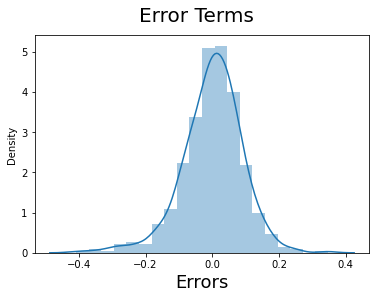

In [212]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**-- From the above histogram we can see that residuals are normally distributed with a mean value zero**

# There is a linear relationship between X and Y

<Figure size 720x1440 with 0 Axes>

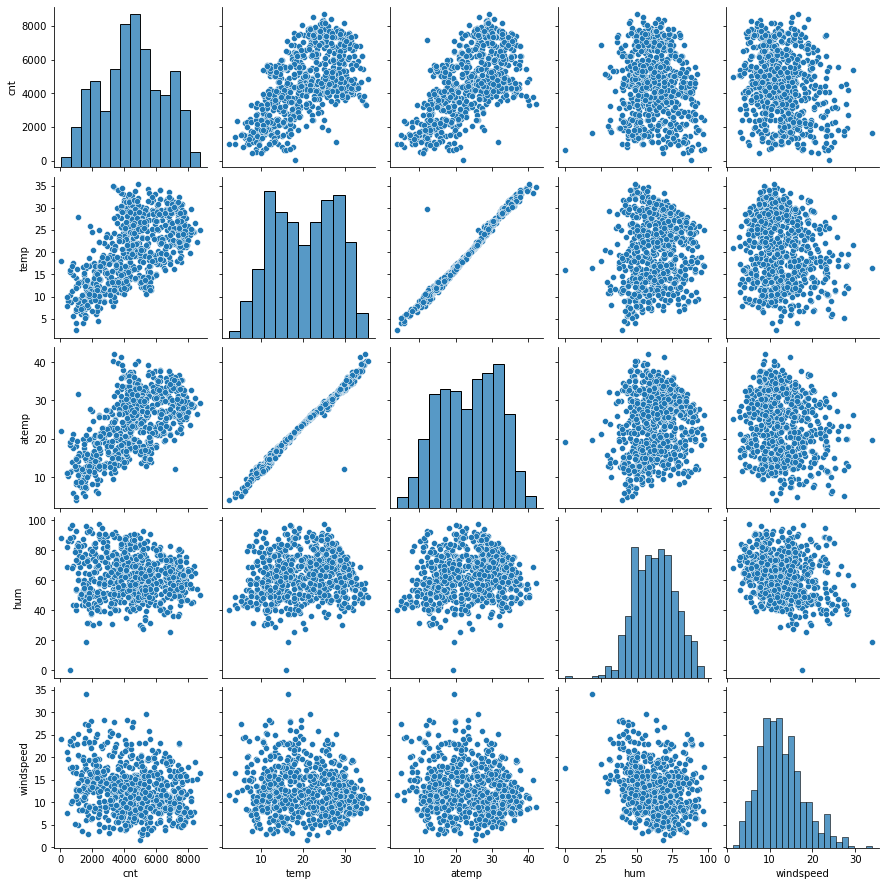

In [242]:
# Drawing pair plot for all the numeric variables
plt.figure(figsize = (10,20))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

**-- From the above scatter plot we can see that there is a linear relationship of temp and atemp with cnt**

# No multicollinearity between the predictor variables

In [243]:
# Check the VIF of the predictor variables
vif = pd.DataFrame()
X = X_train_new_5 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  5.11
3      windspeed  3.11
0             yr  2.00
5       season_4  1.95
4       season_2  1.82
8        mnth_10  1.60
6         mnth_8  1.59
9   weathersit_2  1.49
7         mnth_9  1.34
10  weathersit_3  1.09
1        holiday  1.04

**These variables are not showing multicollinearity**

# Step 7: Making predictions using final model

**We will make predictions using our final model i.e. Model 6**             

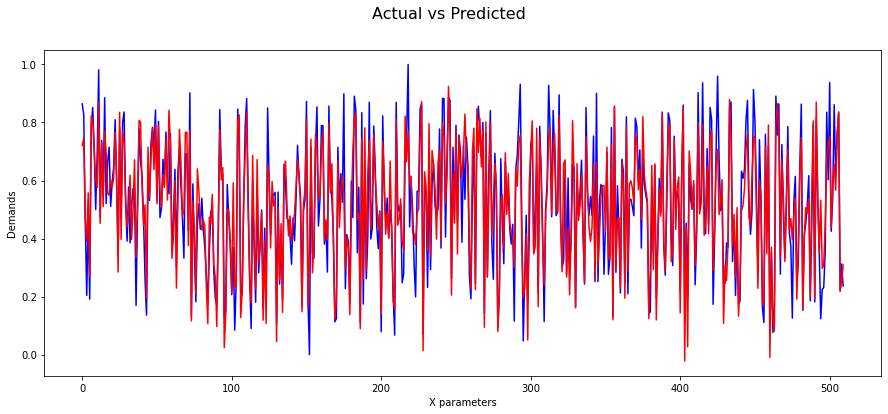

In [221]:
# Check the Actual vs Predicted values
c = [i for i in range(0,len(X_train_lm_6),1)]
plt.figure(figsize=(15,6))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 16)
plt.xlabel('X parameters')
plt.ylabel('Demands')
plt.show()

**The above plot shows the same pattern between actual and predicted. So, we can infer that this model is ok**

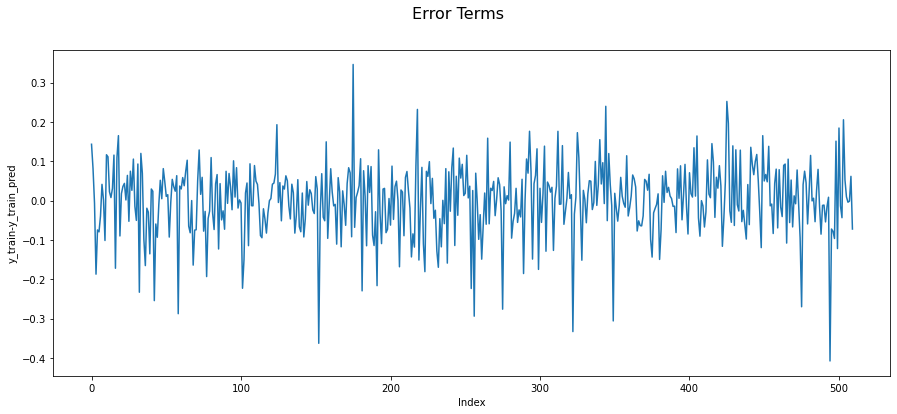

In [222]:
# Check the distribution of error terms
plt.figure(figsize=(15,6))
c = [i for i in range(0,len(X_train_lm_6),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

**The above plot shows the error terms are independent of each other. I also suggests that this model is ok**

**Now apply scaling on the test data set**

In [223]:
# Apply scaler() to all numeric variables in test dataset. Here we will only use scaler.transform instead 
# of scaler.fit_transform which we have used for the train data set.
# Using scaler.fit_transform on test data will cause the leakage of information.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           0  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           0  0.817246  0.741471  0.314298   0.537414   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
184  0.692706         0         1  ...        0        0          0   
535  0.712034         1         0  ...        0        0          0   
299  0.303382         0         0  ...        0        0          0   
221  0.547400         0         1  ...        0        0          0   
152  0.569029         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
184          0          1          0          0          0             1   
535          0          0          1          0          0             0   
299          0          0          0          0          1             1   
221          0          0          0          1          0             0   
152          0          0          0          0          1             0   

     weathersit_3  
184             0  
535             0  
299             0  
221             0  
152             0  

[5 rows x 30 columns]

In [224]:
# Chech the statistical description of these numerical variables
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.481313    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.313350    0.520592    0.264840    0.246575  ...    0.073059   
std      0.159947    0.218435    0.442259    0.432005  ...    0.260830   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198517    0.377531    0.000000    0.000000  ...    0.000000   
50%      0.299459    0.524275    0.000000    0.000000  ...    0.000000   
75%      0.403048    0.672745    1.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.118721    0.123288    0.155251    0.141553    0.132420   
std      0.282125    0.324202    0.329520    0.362974    0.349389    0.339723   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  219.000000    219.000000    219.000000  
mean     0.173516      0.319635      0.027397  
std      0.379560      0.467403      0.163612  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

**Dividing into X_test and y_test**

In [225]:
y_test = df_test.pop('cnt')
X_test = df_test

In [226]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [231]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [233]:
# Making predictions
y_pred = lm_6.predict(X_test_new)

# Step 9: Model evaluation

**Plotting of graph between actual and predicted values**

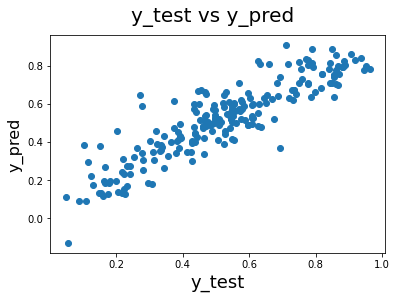

In [234]:
# Plotting the graph on test data set using y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 20)
# X-label
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

**Write the equation of our best fitted line**

In [ ]:
# We have taken the following variables along with their coefficients to write the equation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
const           0.131241
yr              0.232489
holiday        -0.097109
temp            0.517361
windspeed      -0.149737
season_2        0.099972
season_4        0.138343
mnth_8          0.054165
mnth_9          0.116177
weathersit_2   -0.082534
weathersit_3   -0.282834

**cnt = 0.131241 +(yr×0.232489)-(holiday×0.097109)+(temp×0.517361)−(windspeed×0.149737)+(season2×0.099972)+(season4×0.138343)+(mnth8×0.054165)+(mnth9×0.116177)−(weathersit2×0.082534)−(weathersit3×0.282834)**

**We can draw following inferences from the coefficients of this equation**

1. yr: Unit increase in yr variable, increases the bike hire numbers by 0.2324 unit
2. holiday: Unit increase in holiday variable, decreases the bike hire numbers by 0.0432 unit
3. temp: Unit increase in temp variable, increases the bike hire numbers by 0.5173 unit
4. windspeed: Unit increase in windspeed variable, decreases the bike hire numbers by 0.1497 unit
5. season_2: Unit increase in season_2 variable, increases the bike hire numbers by 0.0999 unit
6. season_4: Unit increase in season_2 variable, increases the bike hire numbers by 0.1383 unit
7. mnth_8: Unit increase in mnth_8 variable, increases the bike hire numbers by 0.0541 unit
8. mnth_9: Unit increase in mnth_9 variable, increases the bike hire numbers by 0.1161 unit 
9. weathersit_2: Unit increase in weathersit_2 variable, decreases the bike hire numbers by 0.0825 unit  
10.weathersit_3: Unit increase in weathersit_3 variable, decreases the bike hire numbers by 0.2828 unit

# Step 10: Calculate the R-squared score on the test set

In [236]:
r2_score(y_test, y_pred)

0.7931434526028905

In [ ]:
# R-squared score of our final train model is 0.834 and for test dataset it is 0.79314.

# Conclusion

**1)Based on values of coefficients of our final model top 3 predictors which show maximum effect on the bike bookings are:
    Temperature,
    Year and
    weathersit_3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)**

**2)Based on the selection of top 10 predictors for making our model we can draw following inferences:**

**Year - If sitution will be normal then demand of rental bikes will increase every year**

**Holiday - During holidays there is less demand of rental bikes**

**Temperature - Higher temperature shows more demand of rental bikes**

**Windspeed - It has negative effect on the demand of rental bikes**

**Season - Demand of rental bikes increases during summer and winter**

**Month - August and September are showing highest demand of rental bikes. So, its a good time for company to expand the business.**

**Weather - Light Snowy or Rainy weather shows less number of bike bookings.**